In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import joblib
import matplotlib.pyplot as plt


In [3]:
df_train = pd.read_csv('train.csv')
df_eva = pd.read_csv('traIn.csv')


## Data cleaning

In [4]:
columns=[]
for i in df_train:
    columns.append(i)
columns    

['experience',
 'test_score(out of 10)',
 'interview_score(out of 10)',
 'salary($)']

In [5]:
columns.remove('salary($)')
columns

['experience', 'test_score(out of 10)', 'interview_score(out of 10)']

In [6]:
def is_nan(x):
    return x!=x

In [7]:
number  = ['zero','one','two','three','four','five','six','seven','eight','nine','ten','eleven']

def w2n():
    count=0
    get_num=0
    for i in df_train.experience:
        j=0
        if is_nan(i):
            count= count+1
            continue
        for j in range(len(number)):
            if i==number[j]:
                get_num = j
                break
        df_train.experience[count]=get_num
        count= count+1
def w2n_eva():
    count=0
    get_num=0
    for i in df_eva.experience:
        j=0
        if is_nan(i):
            count= count+1
            continue
        for j in range(len(number)):
            if i==number[j]:
                get_num = j
                break
        df_eva.experience[count]=get_num
        count= count+1

w2n()
w2n_eva()
df_train


C:\Users\Shadin\AppData\Local\Temp/ipykernel_15704/174212491.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.experience[count]=get_num
C:\Users\Shadin\AppData\Local\Temp/ipykernel_15704/174212491.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eva.experience[count]=get_num


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [8]:
for i in columns:
    get_mean=df_train[i].mean()
    df_train[i].fillna(get_mean,inplace=True)
df_train

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,6.333333,8.000000,9,50000
1,6.333333,8.000000,6,45000
2,5.000000,6.000000,7,60000
3,2.000000,10.000000,10,65000
4,7.000000,9.000000,6,70000
5,3.000000,7.000000,10,62000
6,10.000000,7.857143,7,72000
7,11.000000,7.000000,8,80000


In [9]:
for i in columns:
    get_mean=df_eva[i].mean()
    df_eva[i].fillna(get_mean,inplace=True)
df_eva

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,6.333333,8.000000,9,50000
1,6.333333,8.000000,6,45000
2,5.000000,6.000000,7,60000
3,2.000000,10.000000,10,65000
4,7.000000,9.000000,6,70000
5,3.000000,7.000000,10,62000
6,10.000000,7.857143,7,72000
7,11.000000,7.000000,8,80000


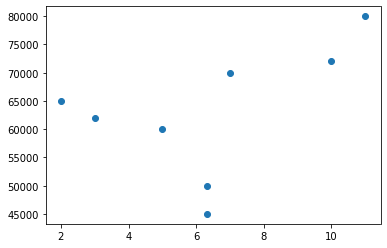

In [10]:
plt.scatter(df_train['experience'],df_train['salary($)'])

In [11]:
model = linear_model.LinearRegression()

In [12]:
model.fit(df_train[columns],df_train['salary($)'])

LinearRegression()

In [13]:
get_new_predict = model.predict(df_eva[columns])

In [14]:
get_new_predict

array([66308.29170585, 57944.83157893, 54813.99505382, 60094.13032013,
       60904.15986263, 59115.30676072, 70215.18793061, 74604.0967873 ])

In [15]:
df_train['salary($)']

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [16]:
df_eva['salary($)']=get_new_predict
df_eva

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,6.333333,8.000000,9,66308.291706
1,6.333333,8.000000,6,57944.831579
2,5.000000,6.000000,7,54813.995054
3,2.000000,10.000000,10,60094.130320
4,7.000000,9.000000,6,60904.159863
5,3.000000,7.000000,10,59115.306761
6,10.000000,7.857143,7,70215.187931
7,11.000000,7.000000,8,74604.096787


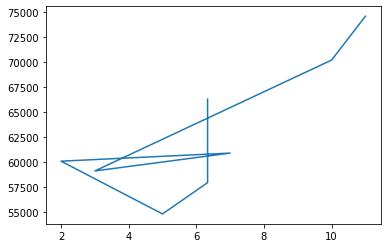

In [17]:
plt.plot(df_eva['experience'],df_eva['salary($)'])

In [18]:
df_train

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,6.333333,8.000000,9,50000
1,6.333333,8.000000,6,45000
2,5.000000,6.000000,7,60000
3,2.000000,10.000000,10,65000
4,7.000000,9.000000,6,70000
5,3.000000,7.000000,10,62000
6,10.000000,7.857143,7,72000
7,11.000000,7.000000,8,80000


In [19]:
df_eva

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,6.333333,8.000000,9,66308.291706
1,6.333333,8.000000,6,57944.831579
2,5.000000,6.000000,7,54813.995054
3,2.000000,10.000000,10,60094.130320
4,7.000000,9.000000,6,60904.159863
5,3.000000,7.000000,10,59115.306761
6,10.000000,7.857143,7,70215.187931
7,11.000000,7.000000,8,74604.096787


In [20]:
joblib.dump(model,'model_dump')

['model_dump']

In [21]:
mp= joblib.load('model_dump')

In [22]:
ge= mp.predict(df_eva[columns])
ge

array([66308.29170585, 57944.83157893, 54813.99505382, 60094.13032013,
       60904.15986263, 59115.30676072, 70215.18793061, 74604.0967873 ])

In [27]:
mp.score(df_train[columns],df_train[' ($)'])

0.3435763109281059